In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# OpenMP ANALYSIS

In [2]:
def calculate_speedup(group):
    group['speedup'] =  group['mean_time'].iloc[0] / group['mean_time']
    return group

In [3]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

sections = ['initialization','evolve_static', 'evolve_ordered']
df = pd.DataFrame(columns=['size', 'threads', 'time', 'section'])
df


for sec in sections:
    if sec == 'initialization':
        file_pattern=f"results/{sec}/openMP_generate.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_generate"
        df=pd.concat([df, df_temp])
    else:
        file_pattern=f"results/{sec}/openMP.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec
        df=pd.concat([df, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1


In [4]:
df

,size,threads,time,section
0,10000,1,0.332685,initialization_generate
1,10000,1,0.309637,initialization_generate
2,10000,1,0.307987,initialization_generate
3,10000,1,0.302777,initialization_generate
4,10000,1,0.302951,initialization_generate
...,...,...,...,...
30,10000,64,485.719639,evolve_ordered
31,10000,64,489.395695,evolve_ordered
32,10000,64,479.337697,evolve_ordered
33,10000,64,495.783095,evolve_ordered


# Evolve static
Now, for example, to analyze the openMP scalability of evolve static, we can simply slice the corresponding part of the dataframe

In [168]:
df_evolve_static = df[df['section']=='evolve_static']
df_evolve_static

,size,threads,time,section
0,10000,1,77.684671,evolve_static
1,10000,1,77.816483,evolve_static
2,10000,1,77.844269,evolve_static
3,10000,1,77.849604,evolve_static
4,10000,1,77.824747,evolve_static
...,...,...,...,...
175,20000,64,5.101643,evolve_static
176,20000,64,5.120398,evolve_static
177,20000,64,5.101622,evolve_static
178,20000,64,5.119469,evolve_static


In [115]:
grouped_df_evolve_static = df_evolve_static.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_static = grouped_df_evolve_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_static

,size,threads,mean_time,std_time
0,10000,1,77.803955,0.068057
1,10000,2,38.866469,0.013706
2,10000,4,19.440782,0.009446
3,10000,8,9.868833,0.019702
4,10000,12,6.546463,0.006467
5,10000,16,4.934244,0.005987
6,10000,20,3.941343,0.003912
7,10000,24,3.326014,0.016730
8,10000,28,2.855158,0.002481
9,10000,32,2.515911,0.015157


In [169]:
grouped_df_evolve_static = grouped_df_evolve_static.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_static

,size,threads,mean_time,std_time,speedup
0,10000,1,77.803955,0.068057,1.000000
1,10000,2,38.866469,0.013706,2.001827
2,10000,4,19.440782,0.009446,4.002100
3,10000,8,9.868833,0.019702,7.883805
4,10000,12,6.546463,0.006467,11.884884
5,10000,16,4.934244,0.005987,15.768161
6,10000,20,3.941343,0.003912,19.740466
7,10000,24,3.326014,0.016730,23.392555
8,10000,28,2.855158,0.002481,27.250311
9,10000,32,2.515911,0.015157,30.924759


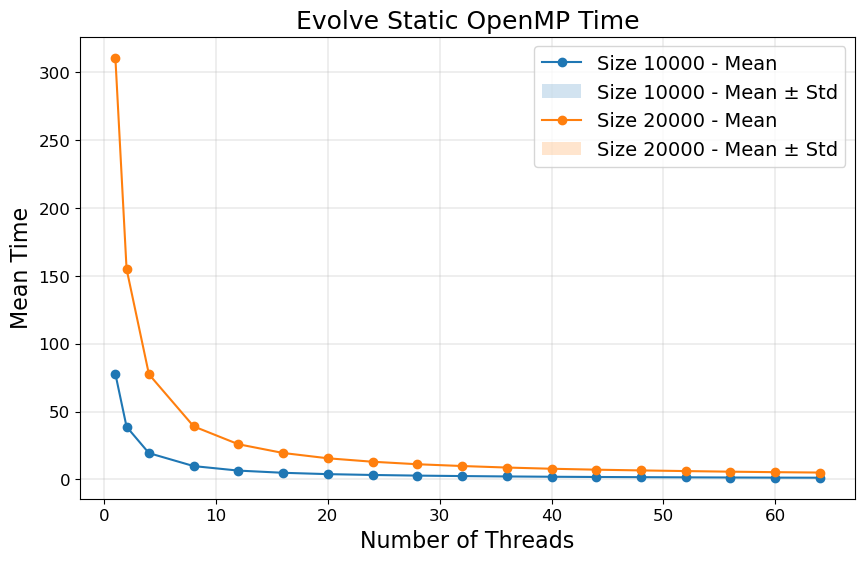

In [170]:
# Separate the DataFrame into two subsets based on size
df_10000 = grouped_df_evolve_static[grouped_df_evolve_static['size'] == 10000]
df_20000 = grouped_df_evolve_static[grouped_df_evolve_static['size'] == 20000]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000['threads'], df_10000['mean_time'] - df_10000['std_time'], df_10000['mean_time'] + df_10000['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000['threads'], df_20000['mean_time'] - df_20000['std_time'], df_20000['mean_time'] + df_20000['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Static OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

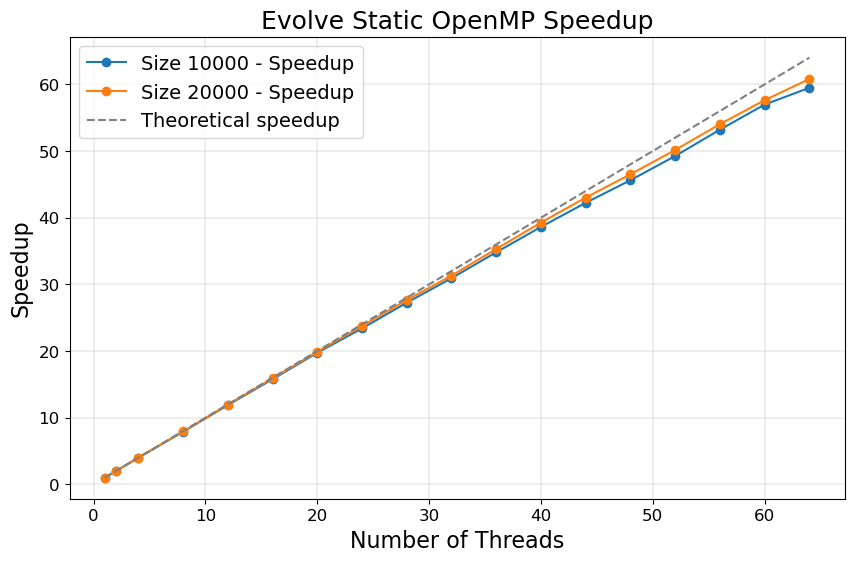

In [171]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['speedup'], label='Size 20000 - Speedup', marker='o')

# Plot to show optimal speedup
plt.plot(df_10000['threads'], df_10000['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Static OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


# Evolve ordered

In [172]:
df_evolve_ordered = df[df['section']=='evolve_ordered']
df_evolve_ordered

grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_ordered = grouped_df_evolve_ordered.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_ordered

,size,threads,mean_time,std_time,speedup
0,10000,1,315.663035,0.092817,1.000000
1,10000,2,311.797344,0.058453,1.012398
2,10000,4,323.431293,0.043643,0.975982
3,10000,8,346.936282,0.611479,0.909859
4,10000,16,380.682292,0.962120,0.829203
5,10000,32,456.907405,8.452096,0.690869
6,10000,64,483.578258,10.711132,0.652765


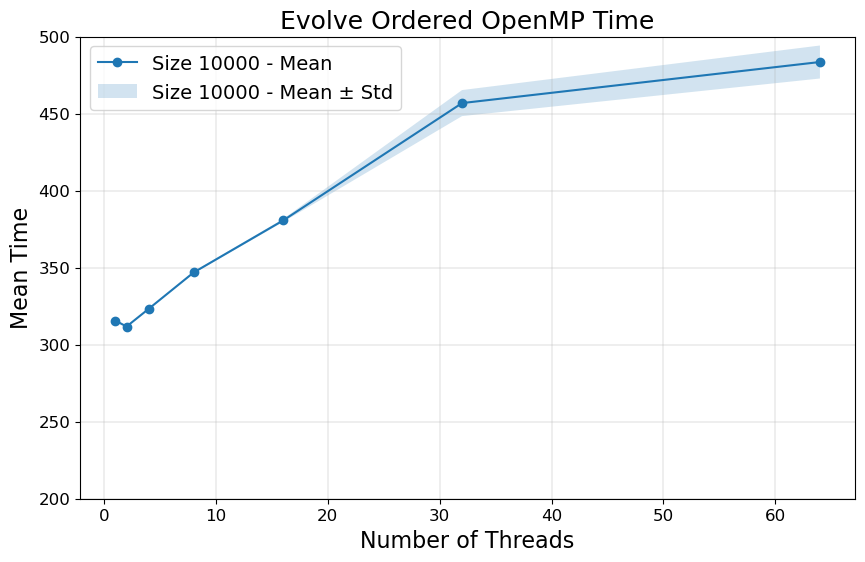

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['mean_time'] - grouped_df_evolve_ordered['std_time'], grouped_df_evolve_ordered['mean_time'] + grouped_df_evolve_ordered['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Ordered OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([200, 500])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

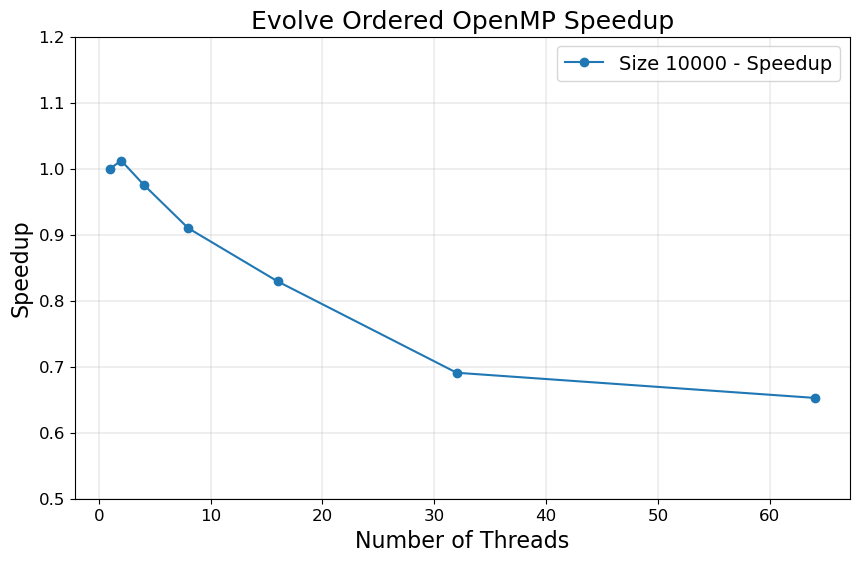

In [176]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot to show optimal speedup
#plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['threads'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Ordered OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([0.5, 1.2])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# Generation

In [5]:
df_initialize_generate = df[df['section']=='initialization_generate']

grouped_df_initialize_generate = df_initialize_generate.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_generate = grouped_df_initialize_generate.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_generate = grouped_df_initialize_generate.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_initialize_generate

,size,threads,mean_time,std_time,speedup
0,10000,1,0.311207,0.012383,1.000000
1,10000,2,0.185715,0.004011,1.675722
2,10000,4,0.117760,0.004746,2.642735
3,10000,8,0.087390,0.004640,3.561117
4,10000,12,0.064896,0.005407,4.795479
5,10000,16,0.052794,0.001486,5.894705
6,10000,20,0.044186,0.003499,7.043090
7,10000,24,0.040342,0.001709,7.714190
8,10000,28,0.042180,0.005476,7.378150
9,10000,32,0.037968,0.003225,8.196484


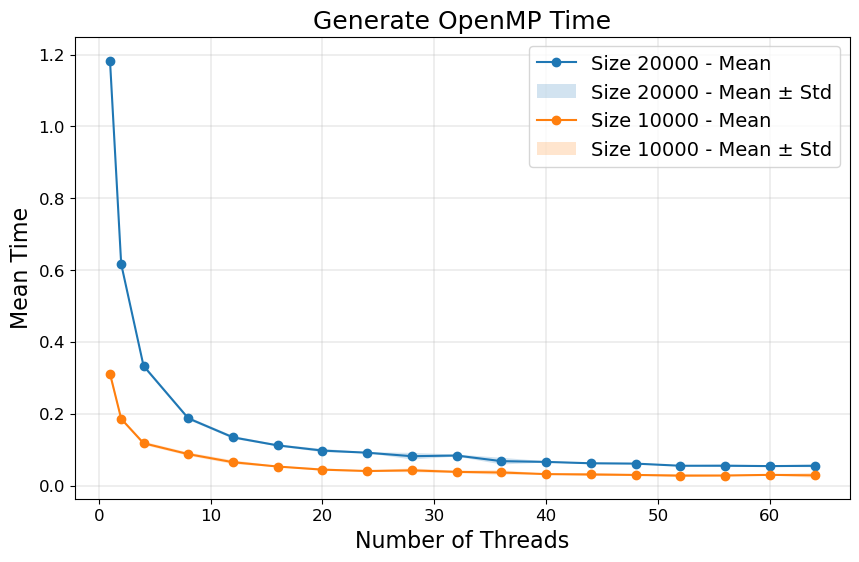

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))
grouped_df_initialize_generate_20000 = grouped_df_initialize_generate[grouped_df_initialize_generate['size']==20000]
grouped_df_initialize_generate_10000 = grouped_df_initialize_generate[grouped_df_initialize_generate['size']==10000]


# Plot for size 20000
plt.plot(grouped_df_initialize_generate_20000['threads'], grouped_df_initialize_generate_20000['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_generate_20000['threads'], grouped_df_initialize_generate_20000['mean_time'] - grouped_df_initialize_generate_20000['std_time'], grouped_df_initialize_generate_20000['mean_time'] + grouped_df_initialize_generate_20000['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')

# Plot for size 10000
plt.plot(grouped_df_initialize_generate_10000['threads'], grouped_df_initialize_generate_10000['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_generate_10000['threads'], grouped_df_initialize_generate_10000['mean_time'] - grouped_df_initialize_generate_10000['std_time'], grouped_df_initialize_generate_10000['mean_time'] + grouped_df_initialize_generate_10000['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Generate OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

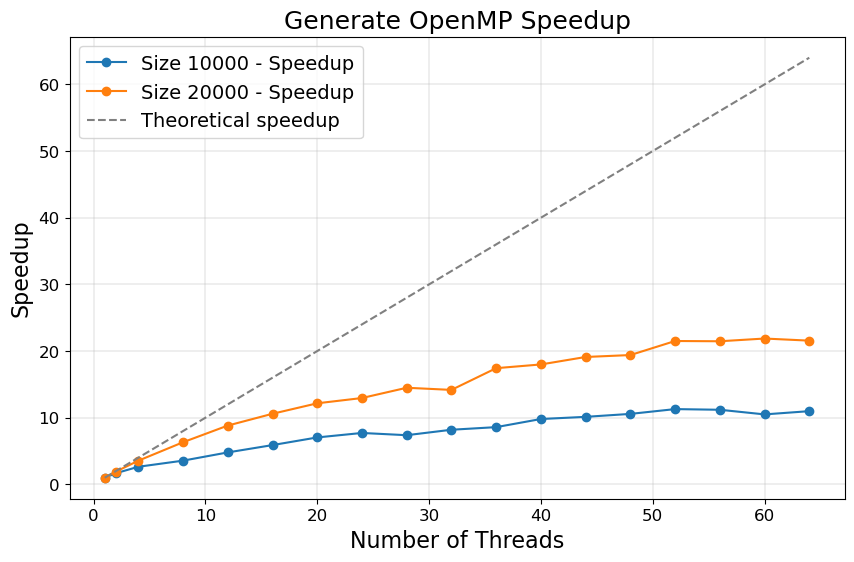

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate_10000['threads'], grouped_df_initialize_generate_10000['speedup'], label='Size 10000 - Speedup', marker='o')
plt.plot(grouped_df_initialize_generate_20000['threads'], grouped_df_initialize_generate_20000['speedup'], label='Size 20000 - Speedup', marker='o')


# Plot to show optimal speedup
plt.plot(grouped_df_initialize_generate_10000['threads'], grouped_df_initialize_generate_10000['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Generate OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# STRONG MPI SOCKET/NUMA

In [8]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

sections = ['initialization','evolve_static', 'evolve_ordered']
types = ['numa']
df = pd.DataFrame(columns=['size', 'processes', 'time', 'section', 'type', 'new'])
df


for sec in sections:
    for ty in types:
        if sec == 'initialization':
            file_pattern=f"results/{sec}/strong_MPI_{ty}_generate.csv"
            print(f"{file_pattern}\n")
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec + "_generate"
            df_temp['type'] = ty
            df_temp['new'] = 'no'
            df=pd.concat([df, df_temp])

            file_pattern=f"results/{sec}/strong_MPI_{ty}_generate_new.csv"
            print(f"{file_pattern}\n")
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec + "_generate"
            df_temp['type'] = ty
            df_temp['new'] = 'yes'
            df=pd.concat([df, df_temp])

            file_pattern=f"results/{sec}/strong_MPI_{ty}_write.csv"
            print(f"{file_pattern}\n")
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec + "_write"
            df_temp['type'] = ty
            df_temp['new'] = 'no'
            df=pd.concat([df, df_temp])

            file_pattern=f"results/{sec}/strong_MPI_{ty}_write_new.csv"
            print(f"{file_pattern}\n")
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec + "_write"
            df_temp['type'] = ty
            df_temp['new'] = 'yes'
            df=pd.concat([df, df_temp])
        else:
            file_pattern=f"results/{sec}/strong_MPI_{ty}.csv"
            print(f"{file_pattern}\n")
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec
            df_temp['type'] = ty
            df_temp['new'] = 'no'
            df=pd.concat([df, df_temp])
            file_pattern=f"results/{sec}/strong_MPI_{ty}_new.csv"
            print(f"{file_pattern}\n")
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec
            df_temp['type'] = ty
            df_temp['new'] = 'yes'
            df=pd.concat([df, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1
results/initialization/strong_MPI_numa_generate.csv

results/initialization/strong_MPI_numa_generate_new.csv

results/initialization/strong_MPI_numa_write.csv

results/initialization/strong_MPI_numa_write_new.csv

results/evolve_static/strong_MPI_numa.csv

results/evolve_static/strong_MPI_numa_new.csv

results/evolve_ordered/strong_MPI_numa.csv

results/evolve_ordered/strong_MPI_numa_new.csv



In [9]:
df

,size,processes,time,section,type,new
0,10000,1,0.076276,initialization_generate,numa,no
1,10000,1,0.075404,initialization_generate,numa,no
2,10000,1,0.075067,initialization_generate,numa,no
3,10000,1,0.075562,initialization_generate,numa,no
4,10000,1,0.075395,initialization_generate,numa,no
...,...,...,...,...,...,...
20,10000,16,312.767050,evolve_ordered,numa,yes
21,10000,16,312.820460,evolve_ordered,numa,yes
22,10000,16,312.849635,evolve_ordered,numa,yes
23,10000,16,312.863081,evolve_ordered,numa,yes


# Evolve static
Now, for example, to analyze the openMP scalability of evolve static, we can simply slice the corresponding part of the dataframe

In [250]:
df_evolve_static = df[df['section']=='evolve_static']
df_evolve_static

,size,processes,time,section,type,new
0,10000,1,19.496422,evolve_static,numa,no
1,10000,1,19.496545,evolve_static,numa,no
2,10000,1,19.562531,evolve_static,numa,no
3,10000,1,19.638319,evolve_static,numa,no
4,10000,1,19.688943,evolve_static,numa,no
...,...,...,...,...,...,...
115,20000,16,5.005346,evolve_static,numa,yes
116,20000,16,5.011183,evolve_static,numa,yes
117,20000,16,4.998765,evolve_static,numa,yes
118,20000,16,5.030958,evolve_static,numa,yes


In [251]:
grouped_df_evolve_static = df_evolve_static.groupby(['size', 'processes', 'type', 'new'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_static = grouped_df_evolve_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_static_new = grouped_df_evolve_static[grouped_df_evolve_static['new']=='yes']
grouped_df_evolve_static_old = grouped_df_evolve_static[grouped_df_evolve_static['new']=='no']
grouped_df_evolve_static_new

,size,processes,type,new,mean_time,std_time
1,10000,1,numa,yes,19.585177,0.070846
3,10000,2,numa,yes,9.749771,0.015054
5,10000,3,numa,yes,6.487261,0.006852
7,10000,4,numa,yes,4.875307,0.002048
9,10000,5,numa,yes,3.881861,0.003525
11,10000,6,numa,yes,3.277055,0.002532
13,10000,7,numa,yes,2.822833,0.006356
15,10000,8,numa,yes,2.475563,0.007458
17,10000,10,numa,yes,2.022947,0.009966
19,10000,12,numa,yes,1.708973,0.007006


In [252]:
grouped_df_evolve_static_new = grouped_df_evolve_static_new.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_static_new

grouped_df_evolve_static_old = grouped_df_evolve_static_old.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_static_old

,size,processes,type,new,mean_time,std_time,speedup
0,10000,1,numa,no,19.576552,0.085827,1.000000
1,10000,2,numa,no,9.832527,0.024306,1.990999
2,10000,3,numa,no,6.554741,0.002696,2.986625
3,10000,4,numa,no,4.940110,0.012616,3.962776
4,10000,5,numa,no,3.939404,0.012163,4.969419
5,10000,6,numa,no,3.317434,0.005195,5.901112
6,10000,7,numa,no,2.854951,0.012378,6.857053
7,10000,8,numa,no,2.521107,0.019779,7.765061
8,10000,10,numa,no,2.019795,0.008349,9.692344
9,10000,12,numa,no,1.718639,0.019091,11.390727


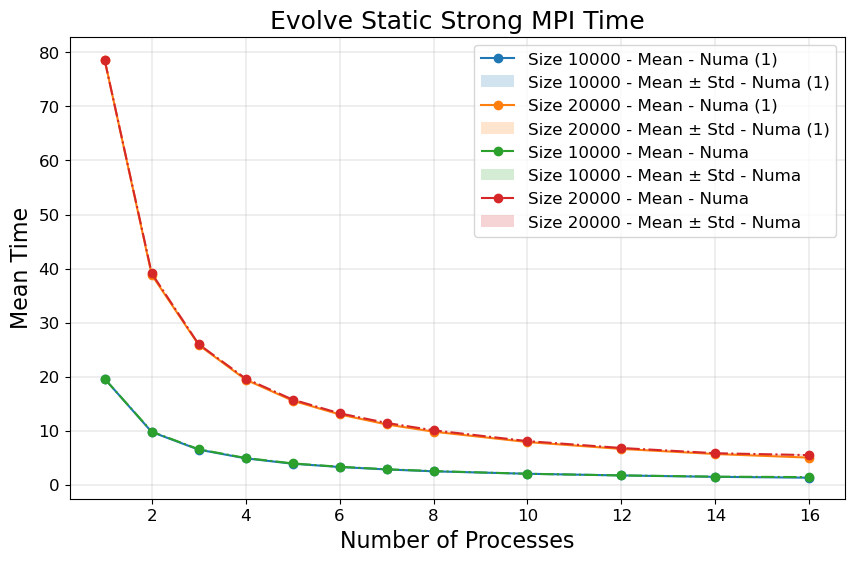

In [263]:
# Separate the DataFrame into two subsets based on size
#df_10000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'socket')]
#df_20000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'socket')]
df_10000_numa_new = grouped_df_evolve_static_new[(grouped_df_evolve_static_new['size'] == 10000) & (grouped_df_evolve_static_new['type'] == 'numa')]
df_20000_numa_new = grouped_df_evolve_static_new[(grouped_df_evolve_static_new['size'] == 20000) & (grouped_df_evolve_static_new['type'] == 'numa')]

df_10000_numa_old = grouped_df_evolve_static_old[(grouped_df_evolve_static_old['size'] == 10000) & (grouped_df_evolve_static_old['type'] == 'numa')]
df_20000_numa_old = grouped_df_evolve_static_old[(grouped_df_evolve_static_old['size'] == 20000) & (grouped_df_evolve_static_old['type'] == 'numa')]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['mean_time'], label='Size 10000 - Mean - Socket', marker='o')
#plt.fill_between(df_10000_socket['processes'], df_10000_socket['mean_time'] - df_10000_socket['std_time'], df_10000_socket['mean_time'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Socket')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['mean_time'], label='Size 20000 - Mean', marker='o')
#plt.fill_between(df_20000_socket['processes'], df_20000_socket['mean_time'] - df_20000_socket['std_time'], df_20000_socket['mean_time'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Socket')

# Plot for size 10000 (1) means new
plt.plot(df_10000_numa_new['processes'], df_10000_numa_new['mean_time'], label='Size 10000 - Mean - Numa (1)', marker='o')
plt.fill_between(df_10000_numa_new['processes'], df_10000_numa_new['mean_time'] - df_10000_numa_new['std_time'], df_10000_numa_new['mean_time'] + df_10000_numa_new['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa (1)')

# Plot for size 20000
plt.plot(df_20000_numa_new['processes'], df_20000_numa_new['mean_time'], label='Size 20000 - Mean - Numa (1)', marker='o')
plt.fill_between(df_20000_numa_new['processes'], df_20000_numa_new['mean_time'] - df_20000_numa_new['std_time'], df_20000_numa_new['mean_time'] + df_20000_numa_new['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa (1)')


# Plot for size 10000 (2) means old
plt.plot(df_10000_numa_old['processes'], df_10000_numa_old['mean_time'], label='Size 10000 - Mean - Numa', marker='o',  ls= '-.')
plt.fill_between(df_10000_numa_old['processes'], df_10000_numa_old['mean_time'] - df_10000_numa_old['std_time'], df_10000_numa_old['mean_time'] + df_10000_numa_old['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa')

# Plot for size 20000
plt.plot(df_20000_numa_old['processes'], df_20000_numa_old['mean_time'], label='Size 20000 - Mean - Numa', marker='o',  ls= '-.')
plt.fill_between(df_20000_numa_old['processes'], df_20000_numa_old['mean_time'] - df_20000_numa_old['std_time'], df_20000_numa_old['mean_time'] + df_20000_numa_old['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Static Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

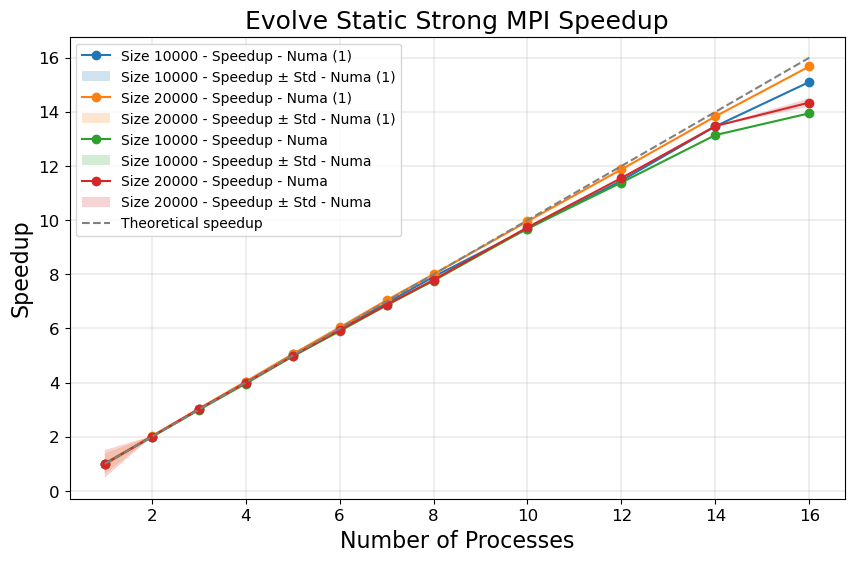

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size
#df_10000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'socket')]
#df_20000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'socket')]
df_10000_numa = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'numa')]
df_20000_numa = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'numa')]

#
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['speedup'], label='Size 10000 - Speedup - Socket', marker='o')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['speedup'], label='Size 20000 - Speedup - Socket', marker='o')

# Plot for size 10000 (1) means new
plt.plot(df_10000_numa_new['processes'], df_10000_numa_new['speedup'], label='Size 10000 - Speedup - Numa (1)', marker='o')
plt.fill_between(df_10000_numa_new['processes'], df_10000_numa_new['speedup'] - df_10000_numa_new['std_time'], df_10000_numa_new['speedup'] + df_10000_numa_new['std_time'], alpha=0.2, label='Size 10000 - Speedup ± Std - Numa (1)')

# Plot for size 20000
plt.plot(df_20000_numa_new['processes'], df_20000_numa_new['speedup'], label='Size 20000 - Speedup - Numa (1)', marker='o')
plt.fill_between(df_20000_numa_new['processes'], df_20000_numa_new['speedup'] - df_20000_numa_new['std_time'], df_20000_numa_new['speedup'] + df_20000_numa_new['std_time'], alpha=0.2, label='Size 20000 - Speedup ± Std - Numa (1)')


# Plot for size 10000 (2) means old
plt.plot(df_10000_numa_old['processes'], df_10000_numa_old['speedup'], label='Size 10000 - Speedup - Numa', marker='o')
plt.fill_between(df_10000_numa_old['processes'], df_10000_numa_old['speedup'] - df_10000_numa_old['std_time'], df_10000_numa_old['speedup'] + df_10000_numa_old['std_time'], alpha=0.2, label='Size 10000 - Speedup ± Std - Numa')

# Plot for size 20000
plt.plot(df_20000_numa_old['processes'], df_20000_numa_old['speedup'], label='Size 20000 - Speedup - Numa', marker='o')
plt.fill_between(df_20000_numa_old['processes'], df_20000_numa_old['speedup'] - df_20000_numa_old['std_time'], df_20000_numa_old['speedup'] + df_20000_numa_old['std_time'], alpha=0.2, label='Size 20000 - Speedup ± Std - Numa')


# Theoretical speedup
plt.plot(df_20000_numa['processes'], df_20000_numa['processes'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Static Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# Evolve Ordered

In [210]:
df_evolve_ordered = df[df['section']=='evolve_ordered'] # ONLY NUMA
df_evolve_ordered

grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'processes', 'type', 'new'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})

In [211]:
grouped_df_evolve_ordered_new = grouped_df_evolve_ordered[grouped_df_evolve_ordered['new']=='yes']
grouped_df_evolve_ordered_new = grouped_df_evolve_ordered_new.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_ordered_new

,size,processes,type,new,mean_time,std_time,speedup
0,10000,1,numa,yes,310.454787,0.246125,1.000000
1,10000,2,numa,yes,310.866604,0.044388,0.998675
2,10000,4,numa,yes,310.938493,0.072954,0.998444
3,10000,8,numa,yes,313.162259,0.153463,0.991354
4,10000,16,numa,yes,312.842123,0.053059,0.992369


In [213]:
grouped_df_evolve_ordered_old = grouped_df_evolve_ordered[grouped_df_evolve_ordered['new']=='no']
grouped_df_evolve_ordered_old = grouped_df_evolve_ordered_old.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_ordered_old

,size,processes,type,new,mean_time,std_time,speedup
0,10000,1,numa,no,309.340197,0.021491,1.000000
1,10000,2,numa,no,351.940353,0.035289,0.878956
2,10000,4,numa,no,393.428070,0.041719,0.786269
3,10000,8,numa,no,515.461292,0.045175,0.600123
4,10000,16,numa,no,491.062379,0.035336,0.629941


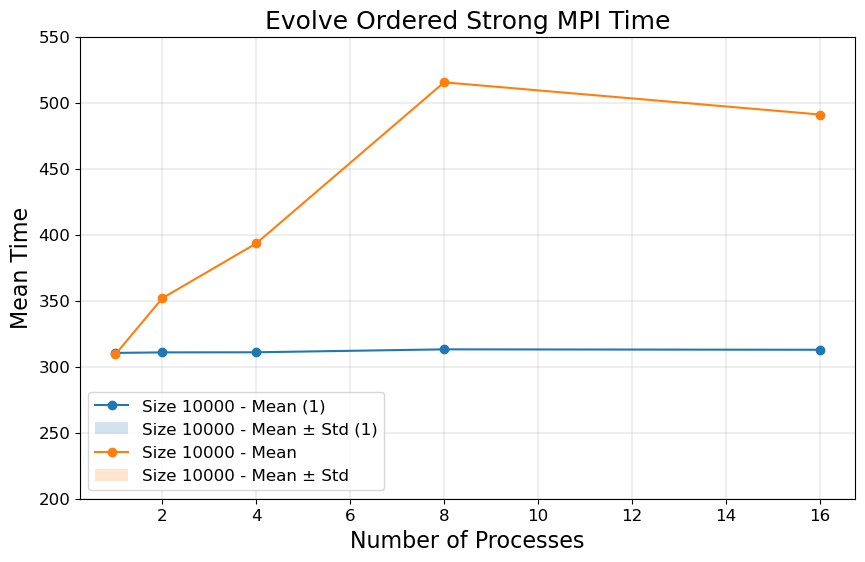

In [215]:
# Create the plot
plt.figure(figsize=(10, 6))


# Plot for new
plt.plot(grouped_df_evolve_ordered_new['processes'], grouped_df_evolve_ordered_new['mean_time'], label='Size 10000 - Mean (1)', marker='o')
plt.fill_between(grouped_df_evolve_ordered_new['processes'], grouped_df_evolve_ordered_new['mean_time'] - grouped_df_evolve_ordered_new['std_time'], grouped_df_evolve_ordered_new['mean_time'] + grouped_df_evolve_ordered_new['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std (1)')

plt.plot(grouped_df_evolve_ordered_old['processes'], grouped_df_evolve_ordered_old['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_evolve_ordered_old['processes'], grouped_df_evolve_ordered_old['mean_time'] - grouped_df_evolve_ordered_old['std_time'], grouped_df_evolve_ordered_old['mean_time'] + grouped_df_evolve_ordered_old['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Ordered Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

plt.ylim([200, 550])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


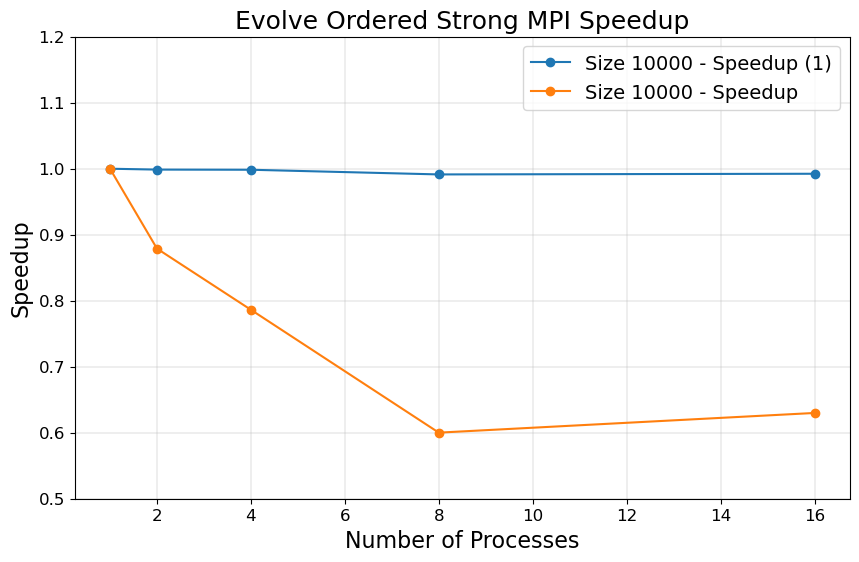

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered_new['processes'], grouped_df_evolve_ordered_new['speedup'], label='Size 10000 - Speedup (1)', marker='o')
plt.plot(grouped_df_evolve_ordered_old['processes'], grouped_df_evolve_ordered_old['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot to show optimal speedup
#plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Ordered Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([0.5, 1.2])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


# Generate


In [12]:
df_initialize_generate = df[df['section']=='initialization_generate']

grouped_df_initialize_generate = df_initialize_generate.groupby(['size', 'processes', 'type', 'section', 'new'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_generate = grouped_df_initialize_generate.rename(columns={'mean': 'mean_time', 'std': 'std_time'})

In [14]:
grouped_df_initialize_generate_new = grouped_df_initialize_generate[grouped_df_initialize_generate['new']=='yes']
grouped_df_initialize_generate_new = grouped_df_initialize_generate_new.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

In [15]:
grouped_df_initialize_generate_old = grouped_df_initialize_generate[grouped_df_initialize_generate['new']=='no']
grouped_df_initialize_generate_old = grouped_df_initialize_generate_old.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

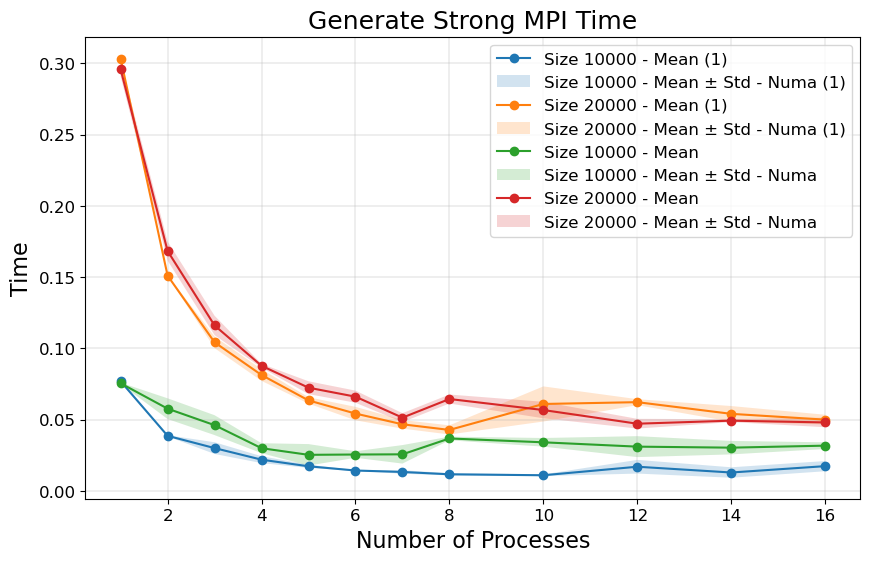

In [16]:
# Separate the DataFrame into subsets based on size
df_10000_new = grouped_df_initialize_generate_new[(grouped_df_initialize_generate_new['size'] == 10000)]
df_20000_new= grouped_df_initialize_generate_new[(grouped_df_initialize_generate_new['size'] == 20000)]

df_10000_old = grouped_df_initialize_generate_old[(grouped_df_initialize_generate_old['size'] == 10000)]
df_20000_old= grouped_df_initialize_generate_old[(grouped_df_initialize_generate_old['size'] == 20000)]
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['mean_time'], label='Size 10000 - Mean', marker='o')
#plt.fill_between(df_10000_socket['processes'], df_10000_socket['mean_time'] - df_10000_socket['std_time'], df_10000_socket['mean_time'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Socket')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['mean_time'], label='Size 20000 - Mean', marker='o')
#plt.fill_between(df_20000_socket['processes'], df_20000_socket['mean_time'] - df_20000_socket['std_time'], df_20000_socket['mean_time'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Socket')

# Plot for size 10000
plt.plot(df_10000_new['processes'], df_10000_new['mean_time'], label='Size 10000 - Mean (1)', marker='o')
plt.fill_between(df_10000_new['processes'], df_10000_new['mean_time'] - df_10000_new['std_time'], df_10000_new['mean_time'] + df_10000_new['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa (1)')

# Plot for size 20000
plt.plot(df_20000_new['processes'], df_20000_new['mean_time'], label='Size 20000 - Mean (1)', marker='o')
plt.fill_between(df_20000_new['processes'], df_20000_new['mean_time'] - df_20000_new['std_time'], df_20000_new['mean_time'] + df_20000_new['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa (1)')


# Plot for size 10000
plt.plot(df_10000_old['processes'], df_10000_old['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000_old['processes'], df_10000_old['mean_time'] - df_10000_old['std_time'], df_10000_old['mean_time'] + df_10000_old['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa')

# Plot for size 20000
plt.plot(df_20000_old['processes'], df_20000_old['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000_old['processes'], df_20000_old['mean_time'] - df_20000_old['std_time'], df_20000_old['mean_time'] + df_20000_old['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Generate Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

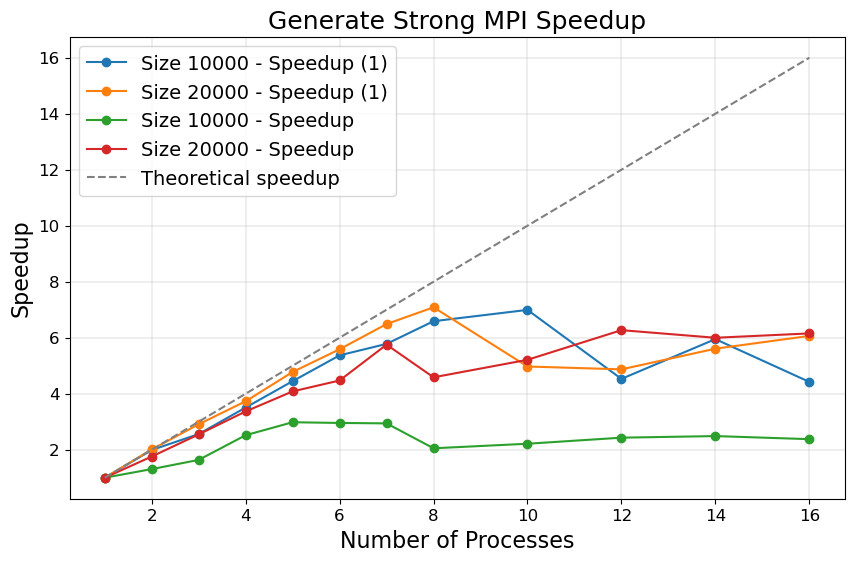

In [17]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000_new['processes'], df_10000_new['speedup'], label='Size 10000 - Speedup (1)', marker='o')

# Plot for size 20000
plt.plot(df_20000_new['processes'], df_20000_new['speedup'], label='Size 20000 - Speedup (1)', marker='o')


# Plot for size 10000
plt.plot(df_10000_old['processes'], df_10000_old['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot for size 20000
plt.plot(df_20000_old['processes'], df_20000_old['speedup'], label='Size 20000 - Speedup', marker='o')


plt.plot(df_20000_old['processes'], df_20000_old['processes'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Generate Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# Write (ASPETTA devi aggiungere i new)

CASOMAI QUA RACCATTEREI ALTRI DATI PER FAR VEDERE CHE IL DROP IN SPEED AVVIENE APPENA INIZIAMO A SCRIVERE DA DUE NODI

In [21]:
df_initialize_write = df[df['section']=='initialization_write']

grouped_df_initialize_write = df_initialize_write.groupby(['size', 'processes', 'type', 'new'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_write = grouped_df_initialize_write.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_write_new = grouped_df_initialize_write[grouped_df_initialize_write['new']=='yes']
grouped_df_initialize_write_new = grouped_df_initialize_write_new.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

grouped_df_initialize_write_old = grouped_df_initialize_write[grouped_df_initialize_write['new']=='no']
grouped_df_initialize_write_old = grouped_df_initialize_write_old.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

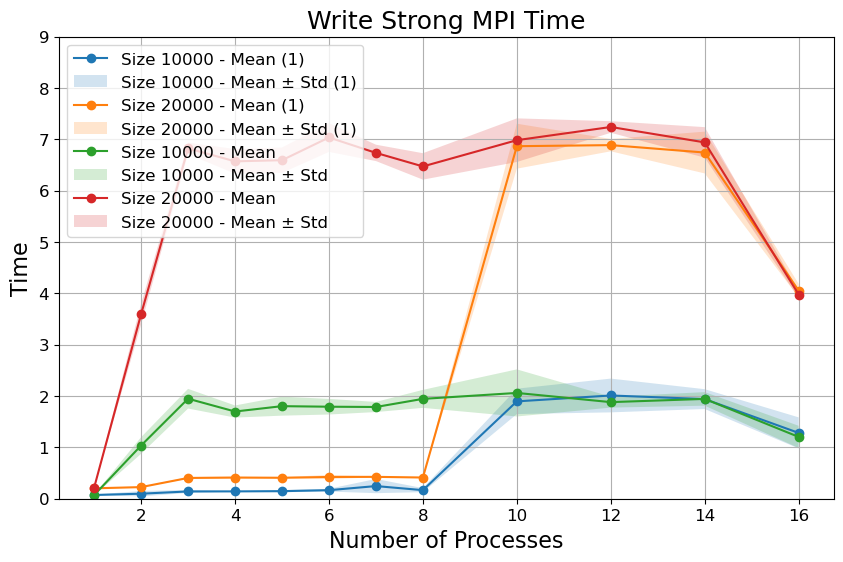

In [33]:
# Separate the DataFrame into subsets based on size
df_10000_new = grouped_df_initialize_write_new[(grouped_df_initialize_write_new['size'] == 10000)]
df_20000_new= grouped_df_initialize_write_new[(grouped_df_initialize_write_new['size'] == 20000)]

df_10000_old = grouped_df_initialize_write_old[(grouped_df_initialize_write_old['size'] == 10000)]
df_20000_old= grouped_df_initialize_write_old[(grouped_df_initialize_write_old['size'] == 20000)]
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['mean_time'], label='Size 10000 - Mean', marker='o')
#plt.fill_between(df_10000_socket['processes'], df_10000_socket['mean_time'] - df_10000_socket['std_time'], df_10000_socket['mean_time'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Socket')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['mean_time'], label='Size 20000 - Mean', marker='o')
#plt.fill_between(df_20000_socket['processes'], df_20000_socket['mean_time'] - df_20000_socket['std_time'], df_20000_socket['mean_time'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Socket')

# Plot for size 10000
plt.plot(df_10000_new['processes'], df_10000_new['mean_time'], label='Size 10000 - Mean (1)', marker='o')
plt.fill_between(df_10000_new['processes'], df_10000_new['mean_time'] - df_10000_new['std_time'], df_10000_new['mean_time'] + df_10000_new['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std (1)')

# Plot for size 20000
plt.plot(df_20000_new['processes'], df_20000_new['mean_time'], label='Size 20000 - Mean (1)', marker='o')
plt.fill_between(df_20000_new['processes'], df_20000_new['mean_time'] - df_20000_new['std_time'], df_20000_new['mean_time'] + df_20000_new['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std (1)')


# Plot for size 10000
plt.plot(df_10000_old['processes'], df_10000_old['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000_old['processes'], df_10000_old['mean_time'] - df_10000_old['std_time'], df_10000_old['mean_time'] + df_10000_old['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Plot for size 20000
plt.plot(df_20000_old['processes'], df_20000_old['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000_old['processes'], df_20000_old['mean_time'] - df_20000_old['std_time'], df_20000_old['mean_time'] + df_20000_old['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Write Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(loc = 'upper left', fontsize=12)
plt.ylim([0, 9])

# Show the plot
plt.grid()
plt.show()

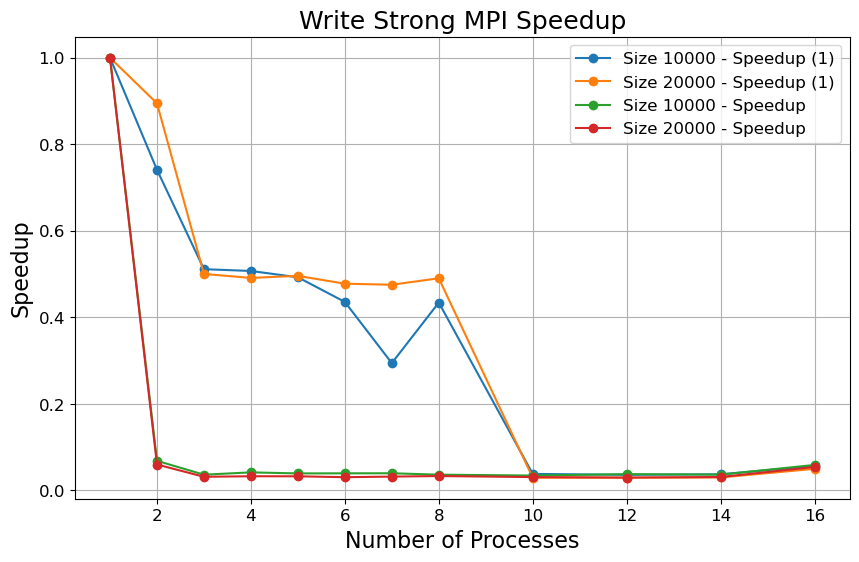

In [34]:
plt.figure(figsize=(10, 6))


# Plot for size 10000
plt.plot(df_10000_new['processes'], df_10000_new['speedup'], label='Size 10000 - Speedup (1)', marker='o')

# Plot for size 20000
plt.plot(df_20000_new['processes'], df_20000_new['speedup'], label='Size 20000 - Speedup (1)', marker='o')

# Plot for size 10000
plt.plot(df_10000_old['processes'], df_10000_old['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot for size 20000
plt.plot(df_20000_old['processes'], df_20000_old['speedup'], label='Size 20000 - Speedup', marker='o')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Write Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.grid()
plt.show()

# WEAK MPI SCALABILITY (NON LA FAREI)
# Evolve Static

In [272]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

sections = ['initialization','evolve_static', 'evolve_ordered']
df = pd.DataFrame(columns=['size', 'processes', 'time', 'section'])
df


for sec in sections:
    if sec == 'initialization':
        file_pattern=f"results/{sec}/weak_MPI_generate.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_generate"
        df=pd.concat([df, df_temp])

        file_pattern=f"results/{sec}/weak_MPI_write.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_write"
        df=pd.concat([df, df_temp])
    else:
        file_pattern=f"results/{sec}/weak_MPI.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec
        df=pd.concat([df, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1


In [226]:
df

,size,processes,time,section
0,10000,1,0.067411,initialization_generate
1,10000,1,0.058125,initialization_generate
2,10000,1,0.067019,initialization_generate
3,10000,1,0.041703,initialization_generate
4,10000,1,0.062820,initialization_generate
...,...,...,...,...
15,20000,4,1617.194966,evolve_ordered
16,20000,4,1617.748876,evolve_ordered
17,20000,4,1617.722912,evolve_ordered
18,20000,4,1615.455682,evolve_ordered


# Evolve static
Now, for example, to analyze the openMP scalability of evolve static, we can simply slice the corresponding part of the dataframe

In [227]:
df_evolve_static = df[df['section']=='evolve_static']
df_evolve_static

,size,processes,time,section
0,10000,1,4.906292,evolve_static
1,10000,1,4.903821,evolve_static
2,10000,1,4.933269,evolve_static
3,10000,1,4.902550,evolve_static
4,10000,1,4.905148,evolve_static
5,14142,2,4.908418,evolve_static
6,14142,2,4.933104,evolve_static
7,14142,2,4.908690,evolve_static
8,14142,2,4.897066,evolve_static
9,14142,2,4.909147,evolve_static


In [228]:
grouped_df_evolve_static = df_evolve_static.groupby(['size', 'processes'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_static = grouped_df_evolve_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_static['speedup'] = grouped_df_evolve_static['mean_time'][0] / grouped_df_evolve_static['mean_time'] 
grouped_df_evolve_static

,size,processes,mean_time,std_time,speedup
0,10000,1,4.910216,0.012963,1.000000
1,14142,2,4.911285,0.013208,0.999782
2,17320,3,4.984596,0.031740,0.985078
3,20000,4,5.023335,0.026029,0.977481
4,22360,5,4.991855,0.014388,0.983646
5,24494,6,5.039287,0.014844,0.974387


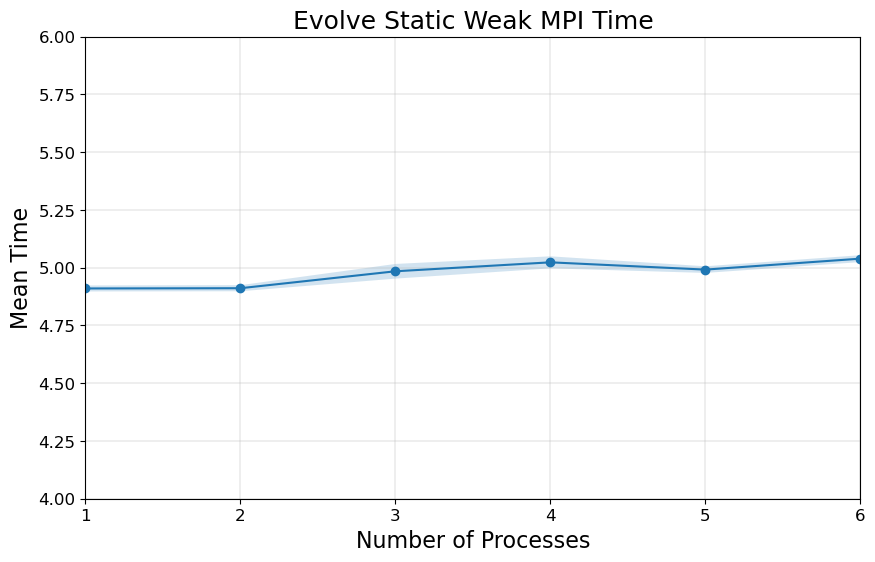

In [229]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot 
plt.plot(grouped_df_evolve_static['processes'], grouped_df_evolve_static['mean_time'],  marker='o')
plt.fill_between(grouped_df_evolve_static['processes'], grouped_df_evolve_static['mean_time'] - grouped_df_evolve_static['std_time'], grouped_df_evolve_static['mean_time'] + grouped_df_evolve_static['std_time'], alpha=0.2)


# Add labels and title
plt.xlabel('Number of processes')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Processes for Different Matrix Sizes')

# Add legend
plt.axis([1, 6, 4, 6])

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Static Weak MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend


# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

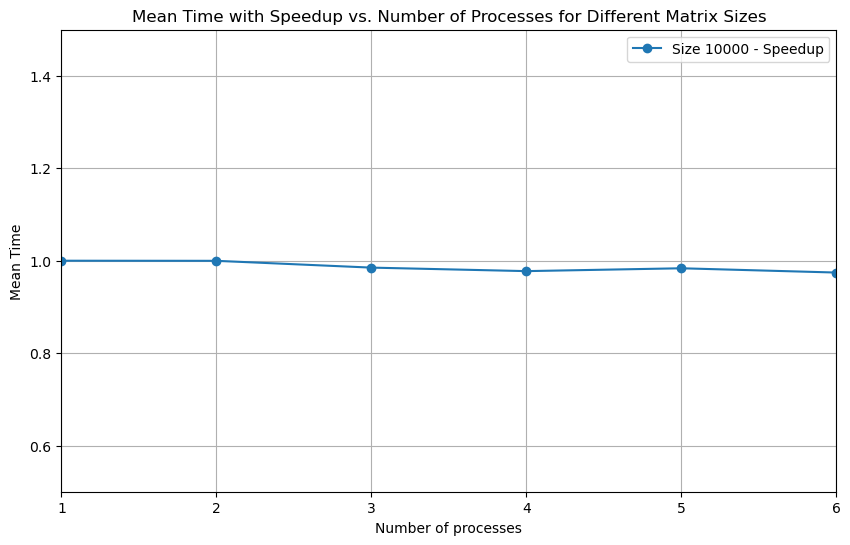

In [230]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_static['processes'], grouped_df_evolve_static['speedup'], label='Size 10000 - Speedup', marker='o')


# Theoretical speedup

# Add labels and title
plt.xlabel('Number of processes')
plt.ylabel('Mean Time')
plt.title('Mean Time with Speedup vs. Number of Processes for Different Matrix Sizes')
plt.axis([1, 6, 0.5, 1.5])

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Evolve Ordered

In [231]:
df_evolve_ordered = df[df['section']=='evolve_ordered'] # ONLY NUMA
df_evolve_ordered

grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'processes'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_ordered['speedup'] = grouped_df_evolve_ordered['mean_time'][0] / grouped_df_evolve_ordered['mean_time'] 
grouped_df_evolve_ordered

,size,processes,mean_time,std_time,speedup
0,10000,1,309.914232,0.016948,1.000000
1,14142,2,805.550175,0.097419,0.384724
2,17320,3,1224.660493,9.580249,0.253061
3,20000,4,1616.890167,0.987051,0.191673


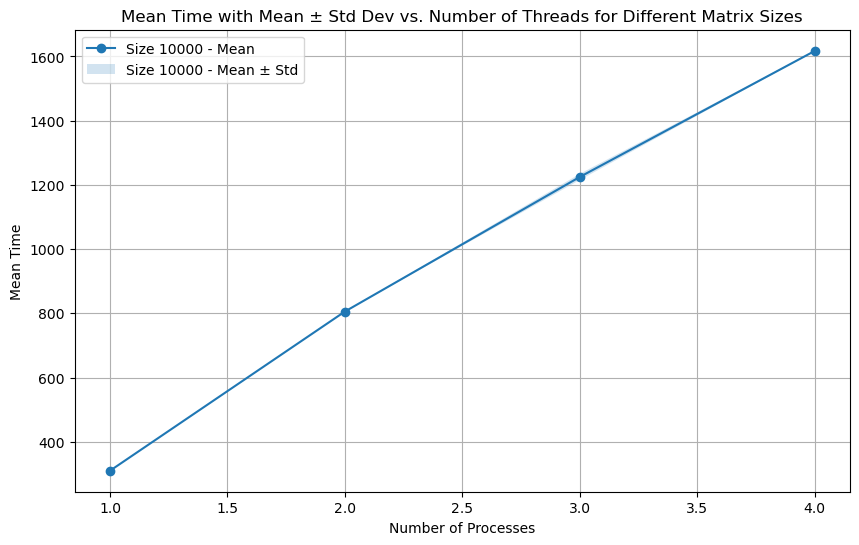

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['mean_time'] - grouped_df_evolve_ordered['std_time'], grouped_df_evolve_ordered['mean_time'] + grouped_df_evolve_ordered['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

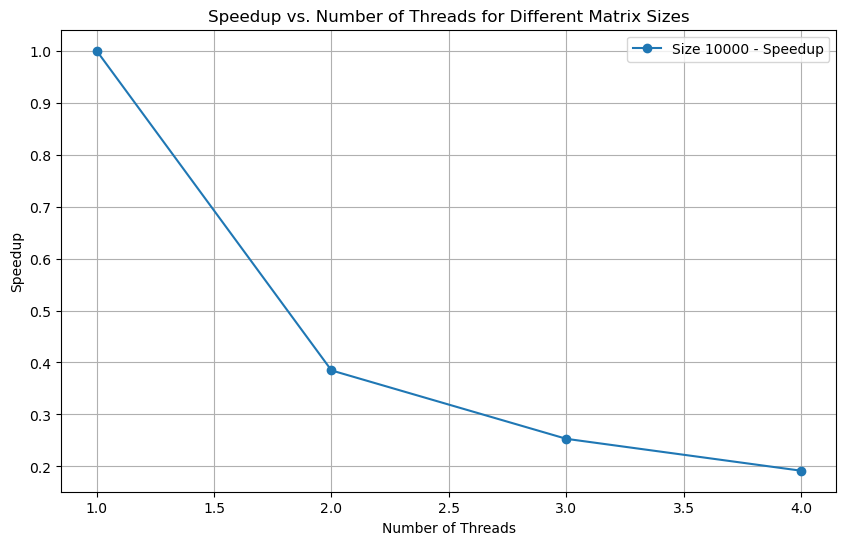

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot to show optimal speedup
#plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


# Generate

In [273]:
df_initialize_generate = df[df['section']=='initialization_generate']

grouped_df_initialize_generate = df_initialize_generate.groupby(['size', 'processes', 'section'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_generate = grouped_df_initialize_generate.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_generate['speedup'] = grouped_df_initialize_generate['mean_time'][0] / grouped_df_initialize_generate['mean_time'] 
grouped_df_initialize_generate

,size,processes,section,mean_time,std_time,speedup
0,10000,1,initialization_generate,0.059416,0.010592,1.000000
1,14142,2,initialization_generate,0.059211,0.009840,1.003449
2,17320,3,initialization_generate,0.061868,0.011636,0.960358
3,20000,4,initialization_generate,0.077029,0.004292,0.771341
4,22360,5,initialization_generate,0.076548,0.023980,0.776192
5,24494,6,initialization_generate,0.075666,0.010647,0.785231


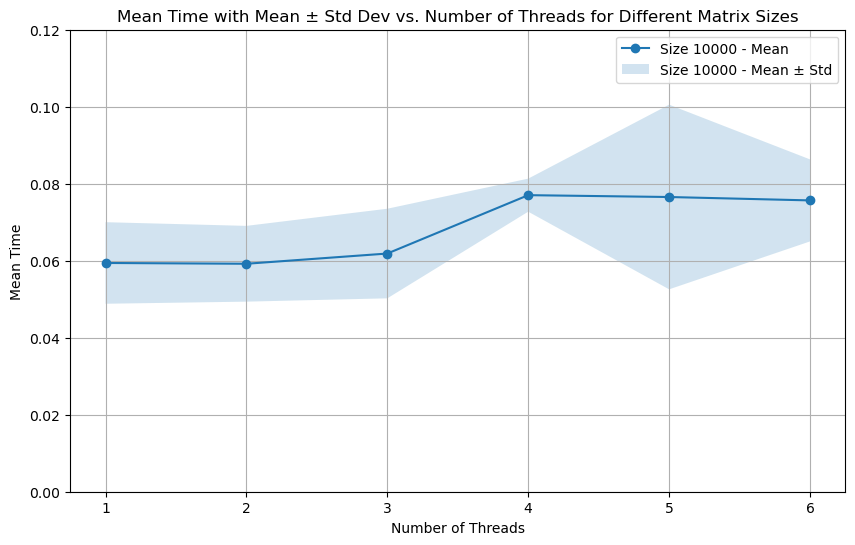

In [274]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['mean_time'] - grouped_df_initialize_generate['std_time'], grouped_df_initialize_generate['mean_time'] + grouped_df_initialize_generate['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

plt.ylim([0, 0.12])
# Show the plot
plt.grid()
plt.show()

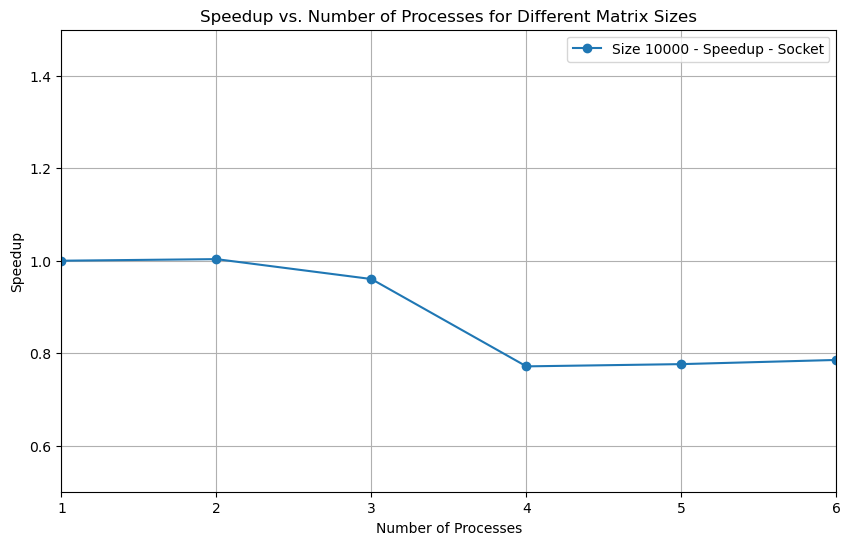

In [275]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['speedup'], label='Size 10000 - Speedup - Socket', marker='o')

# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes for Different Matrix Sizes')
plt.axis([1, 6, 0.5, 1.5])

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Write 

In [241]:
df_initialize_write = df[df['section']=='initialization_write']

grouped_df_initialize_write = df_initialize_write.groupby(['size', 'processes'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_write = grouped_df_initialize_write.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_write['speedup'] = grouped_df_initialize_write['mean_time'][0] / grouped_df_initialize_write['mean_time'] 
grouped_df_initialize_write

,size,processes,mean_time,std_time,speedup
0,10000,1,0.114013,0.070460,1.000000
1,14142,2,1.871213,0.076771,0.060930
2,17320,3,6.064794,0.686154,0.018799
3,20000,4,7.209785,0.310205,0.015814
4,22360,5,9.180692,0.256100,0.012419
5,24494,6,10.555039,0.421588,0.010802


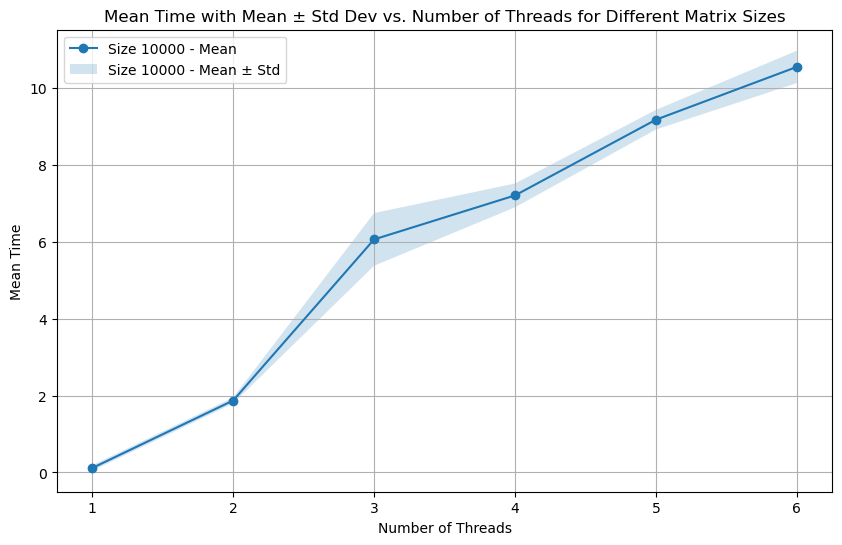

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Separate the DataFrame into two subsets based on size
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_write['processes'], grouped_df_initialize_write['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_write['processes'], grouped_df_initialize_write['mean_time'] - grouped_df_initialize_write['std_time'], grouped_df_initialize_write['mean_time'] + grouped_df_initialize_write['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

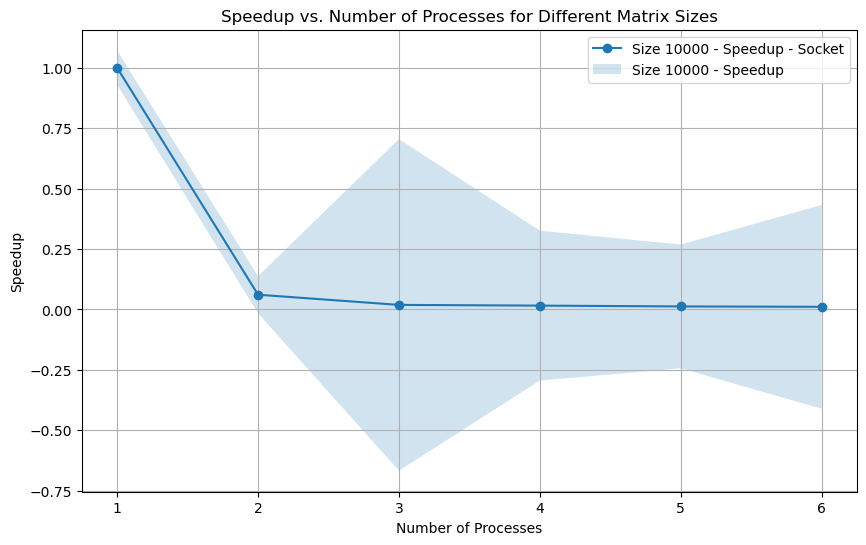

In [243]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_write['processes'], grouped_df_initialize_write['speedup'], label='Size 10000 - Speedup - Socket', marker='o')
plt.fill_between(grouped_df_initialize_write['processes'], grouped_df_initialize_write['speedup'] - grouped_df_initialize_write['std_time'], grouped_df_initialize_write['speedup'] + grouped_df_initialize_write['std_time'], alpha=0.2, label='Size 10000 - Speedup')

# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Evolve BW

In [3]:
file_path = 'results/evolve_black_white/openMP.csv'
df_BW = pd.read_csv(file_path)
df_BW

,size,threads,time
0,9999,1,303.313253
1,9999,1,304.109194
2,9999,1,304.014889
3,9999,1,303.421690
4,9999,1,303.827044
...,...,...,...
136,20000,64,35.906432
137,20000,64,36.044899
138,20000,64,36.365420
139,20000,64,36.053151


In [4]:
df_BW_grouped = df_BW.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index() 
df_BW_grouped = df_BW_grouped.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_BW_grouped = df_BW_grouped.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
df_BW_grouped

,size,threads,mean_time,std_time,speedup
0,9999,1,303.737214,0.354556,1.000000
1,9999,2,152.739426,0.129210,1.988597
2,9999,4,77.565299,0.221009,3.915890
3,9999,8,41.346379,0.147504,7.346162
4,9999,16,23.554353,0.048736,12.895163
5,9999,32,16.241721,0.018776,18.701049
6,9999,64,16.565986,0.071878,18.334992
7,10000,1,321.854966,0.049527,1.000000
8,10000,2,162.423201,0.207277,1.981582
9,10000,4,82.134505,0.036626,3.918633


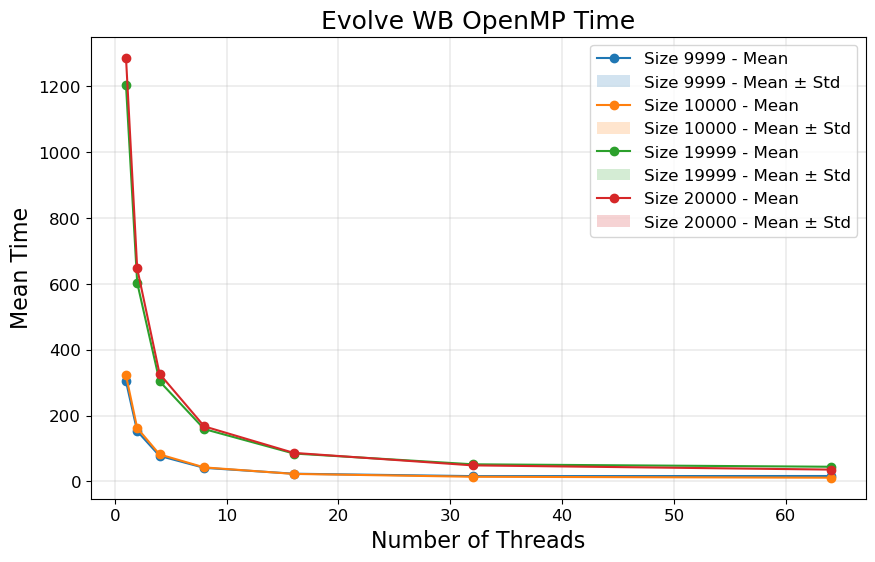

In [6]:
# Separate the DataFrame into two subsets based on size
df_9999 = df_BW_grouped[df_BW_grouped['size'] == 9999]
df_10000 = df_BW_grouped[df_BW_grouped['size'] == 10000]
df_19999 = df_BW_grouped[df_BW_grouped['size'] == 19999]
df_20000 = df_BW_grouped[df_BW_grouped['size'] == 20000]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 9999
plt.plot(df_9999['threads'], df_9999['mean_time'], label='Size 9999 - Mean', marker='o')
plt.fill_between(df_9999['threads'], df_9999['mean_time'] - df_9999['std_time'], df_9999['mean_time'] + df_9999['std_time'], alpha=0.2, label='Size 9999 - Mean ± Std')

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000['threads'], df_10000['mean_time'] - df_10000['std_time'], df_10000['mean_time'] + df_10000['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Plot for size 19999
plt.plot(df_19999['threads'], df_19999['mean_time'], label='Size 19999 - Mean', marker='o')
plt.fill_between(df_19999['threads'], df_19999['mean_time'] - df_19999['std_time'], df_19999['mean_time'] + df_19999['std_time'], alpha=0.2, label='Size 19999 - Mean ± Std')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000['threads'], df_20000['mean_time'] - df_20000['std_time'], df_20000['mean_time'] + df_20000['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve WB OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

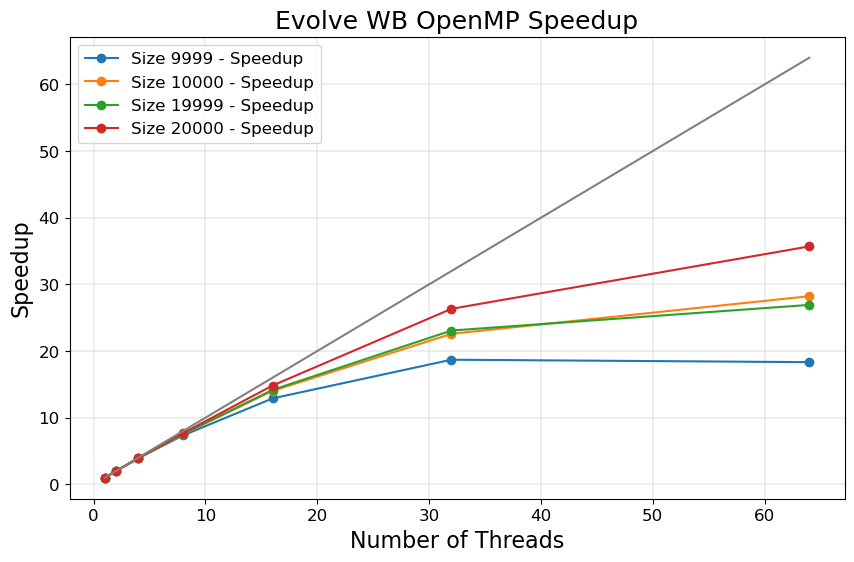

In [8]:
# Separate the DataFrame into two subsets based on size
df_9999 = df_BW_grouped[df_BW_grouped['size'] == 9999]
df_10000 = df_BW_grouped[df_BW_grouped['size'] == 10000]
df_19999 = df_BW_grouped[df_BW_grouped['size'] == 19999]
df_20000 = df_BW_grouped[df_BW_grouped['size'] == 20000]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 9999
plt.plot(df_9999['threads'], df_9999['speedup'], label='Size 9999 - Speedup', marker='o')

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot for size 19999
plt.plot(df_19999['threads'], df_19999['speedup'], label='Size 19999 - Speedup', marker='o')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['speedup'], label='Size 20000 - Speedup', marker='o')

# Theoretical speedup
plt.plot(df_20000['threads'], df_20000['threads'], c="gray")


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve WB OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# SUMMARY FINALE
## OpenMP

In [38]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

df_OMP = pd.DataFrame(columns=['size', 'threads', 'time', 'section'])

file_pattern="results/evolve_static/openMP.csv"
df_temp = pd.read_csv(file_pattern)
df_temp['section'] = 'evolve_static'
df_OMP = pd.concat([df_OMP, df_temp])

file_pattern="results/evolve_ordered/openMP.csv"
df_temp = pd.read_csv(file_pattern)
df_temp['section'] = 'evolve_ordered'
df_OMP = pd.concat([df_OMP, df_temp])

file_pattern="results/evolve_black_white/openMP.csv"
df_temp = pd.read_csv(file_pattern)
df_temp['section'] = 'evolve_bw'
df_OMP = pd.concat([df_OMP, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1


In [40]:
df_OMP = df_OMP[(df_OMP['size']==10000) | (df_OMP['size']==9999)]
df_OMP

,size,threads,time,section
0,10000,1,77.684671,evolve_static
1,10000,1,77.816483,evolve_static
2,10000,1,77.844269,evolve_static
3,10000,1,77.849604,evolve_static
4,10000,1,77.824747,evolve_static
...,...,...,...,...
65,10000,64,11.407099,evolve_bw
66,10000,64,11.378666,evolve_bw
67,10000,64,11.362094,evolve_bw
68,10000,64,11.479928,evolve_bw


In [ ]:
grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_ordered = grouped_df_evolve_ordered.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_ordered

In [51]:
df_OMP_grouped = df_OMP.groupby(['size', 'threads', 'section'])['time'].agg(['mean', 'std']).reset_index()

df_OMP_grouped_bw_9999 = df_OMP_grouped[df_OMP_grouped['size']==9999]
df_OMP_grouped_bw_9999 = df_OMP_grouped_bw_9999.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_OMP_grouped_bw_9999 = df_OMP_grouped_bw_9999.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

df_OMP_grouped_bw_10000 = df_OMP_grouped[(df_OMP_grouped['size']==10000) & (df_OMP_grouped['section']=='evolve_bw')]
df_OMP_grouped_bw_10000 = df_OMP_grouped_bw_10000.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_OMP_grouped_bw_10000 = df_OMP_grouped_bw_10000.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

df_OMP_static = df_OMP_grouped[df_OMP_grouped['section']=='evolve_static']
df_OMP_static = df_OMP_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_OMP_static = df_OMP_static.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

df_OMP_ordered = df_OMP_grouped[df_OMP_grouped['section']=='evolve_ordered']
df_OMP_ordered = df_OMP_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_OMP_ordered = df_OMP_ordered.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

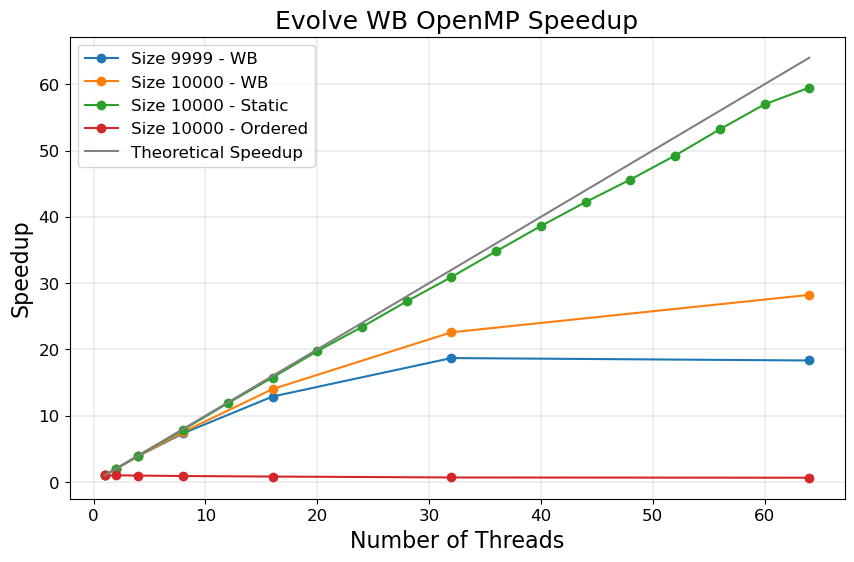

In [69]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 9999
plt.plot(df_OMP_grouped_bw_9999['threads'], df_OMP_grouped_bw_9999['speedup'], label='Size 9999 - WB', marker='o')

# Plot for size 10000
plt.plot(df_OMP_grouped_bw_10000['threads'], df_OMP_grouped_bw_10000['speedup'], label='Size 10000 - WB', marker='o')

# Plot for size 19999
plt.plot(df_OMP_static['threads'], df_OMP_static['speedup'], label='Size 10000 - Static', marker='o')

# Plot for size 20000
plt.plot(df_OMP_ordered['threads'], df_OMP_ordered['speedup'], label='Size 10000 - Ordered', marker='o')

# Theoretical speedup
plt.plot(df_OMP_ordered['threads'], df_OMP_ordered['threads'], c="gray", label='Theoretical Speedup')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve WB OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

In [61]:
# SUMMARY FINALE
## OpenMP
df_MPI = pd.DataFrame(columns=['size', 'processes', 'time', 'section'])

file_pattern = "results/evolve_static/strong_MPI_numa_new.csv"
df_temp = pd.read_csv(file_pattern)
df_temp['section'] = 'evolve_static'
df_MPI = pd.concat([df_OMP, df_temp])

file_pattern = "results/evolve_ordered/strong_MPI_numa_new.csv"
df_temp = pd.read_csv(file_pattern)
df_temp['section'] = 'evolve_ordered'
df_MPI = pd.concat([df_OMP, df_temp])

In [64]:
df_MPI_static = df_MPI[(df_MPI['size']==10000) & (df_MPI['section']=='evolve_static')]
df_MPI_ordered = df_MPI[(df_MPI['size']==10000) & (df_MPI['section']=='evolve_ordered')]

In [68]:
df_MPI_static_grouped = df_MPI_static.groupby(['size', 'processes', 'section'])['time'].agg(['mean', 'std']).reset_index()
df_MPI_static_grouped = df_MPI_static_grouped.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_MPI_static_grouped = df_MPI_static_grouped.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)


df_MPI_ordered_grouped = df_MPI_ordered.groupby(['size', 'processes', 'section'])['time'].agg(['mean', 'std']).reset_index()
df_MPI_ordered_grouped = df_MPI_ordered_grouped.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_MPI_ordered_grouped = df_MPI_ordered_grouped.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)

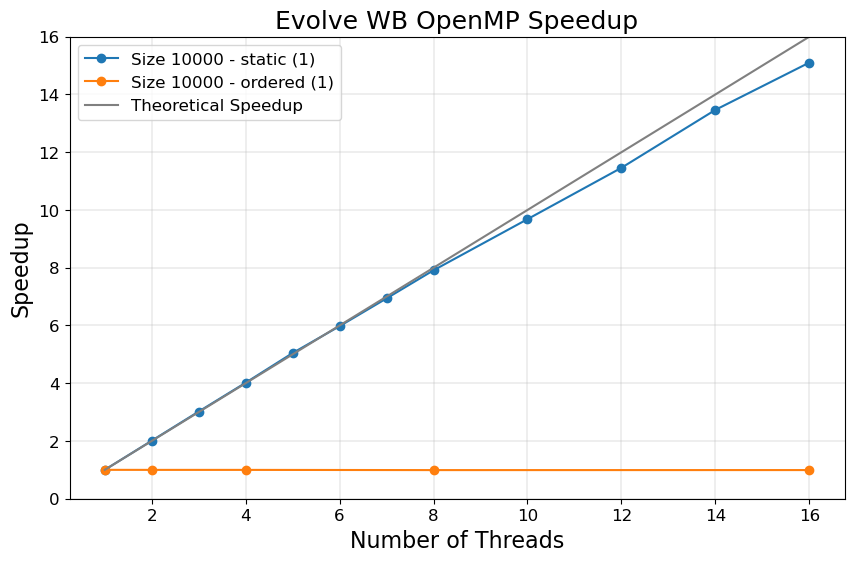

In [75]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 9999
plt.plot(df_MPI_static_grouped['processes'], df_MPI_static_grouped['speedup'], label='Size 10000 - static (1)', marker='o')

# Plot for size 10000
plt.plot(df_MPI_ordered_grouped['processes'], df_MPI_ordered_grouped['speedup'], label='Size 10000 - ordered (1)', marker='o')


# Theoretical speedup
plt.plot(df_MPI_ordered_grouped['processes'], df_MPI_ordered_grouped['processes'], c="gray", label='Theoretical Speedup')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve WB OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)
plt.ylim([0, 16])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()